In [251]:
import tensorflow as tf
import keras
from LoadDataModule import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools    
from sklearn.metrics import classification_report

In [252]:
# Part 1: ANN classifier
# Load images and labels using LoadDataModule()
ld = LoadDataModule()
images, labels = ld.load('train')

In [256]:
# From sklearn's website
# Located here: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [257]:
images.shape

(60000, 784)

In [258]:
labels.shape

(60000,)

In [259]:
images[1,:].shape

(784,)

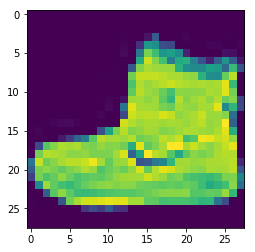

In [260]:
plt.imshow(np.reshape(images[0,:],(28,28)))

In [261]:
# Convert labels to categorical one-hot encoding
labels = keras.utils.to_categorical(labels, num_classes=10)
labels.shape

(60000, 10)

In [262]:
y_val = keras.utils.to_categorical(yTest, num_classes=10)
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [263]:
imgs, lbls = ld.load('test')
y_test = keras.utils.to_categorical(lbls, num_classes=10)
y_test.shape
class_names = ['T-shirt / top', 
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot']

In [264]:
# Set random seed to Student ID
seed = 105792018
np.random.seed(seed)

# ANN Model:
# In = 48000 (train) 12000 (test)
# H1 = 784; tanh
# H2 = 512; sigmoid
# H3 = 100; relu
# Out = 10; softmax

from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

# This returns a tensor 28x28 grayscale image
inputs = Input(shape=(784,))
rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9)


# a layer instance is callable on a tensor, and returns a tensor
x = Dense(784, activation='tanh')(inputs)
x = Dense(512, activation='sigmoid')(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and four Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())
plot_model(model, to_file='C:\\Users\\Tish\\Documents\\DeepLearning\\ann')

#tensorboard = keras.callbacks.TensorBoard(log_dir='C:\\Users\\Tish\\Documents\\DeepLearning\\Graph1\\', histogram_freq=0,  
#          write_graph=True, write_images=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_73 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                1010      
Total params: 1,069,670
Trainable params: 1,069,670
Non-trainable params: 0
_________________________________________________________________
None


In [265]:
#fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
print(images.shape)
print(labels.shape)
training_history_1 = model.fit(images, labels, epochs=50, batch_size=200, callbacks=[tensorboard], validation_split=0.2, shuffle=False)

(60000, 784)
(60000, 10)
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.7585 - acc: 0.7653 - val_loss: 0.5099 - val_acc: 0.8247
Epoch 2/50
48000/48000 [==============================] - 3s 62us/step - loss: 0.4776 - acc: 0.8306 - val_loss: 0.4530 - val_acc: 0.8360
Epoch 3/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.4382 - acc: 0.8442 - val_loss: 0.4357 - val_acc: 0.8414
Epoch 4/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.4156 - acc: 0.8515 - val_loss: 0.4177 - val_acc: 0.8497
Epoch 5/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.4004 - acc: 0.8554 - val_loss: 0.4052 - val_acc: 0.8516
Epoch 6/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.3898 - acc: 0.8590 - val_loss: 0.4017 - val_acc: 0.8537
Epoch 7/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.3815 - acc: 0.8628 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


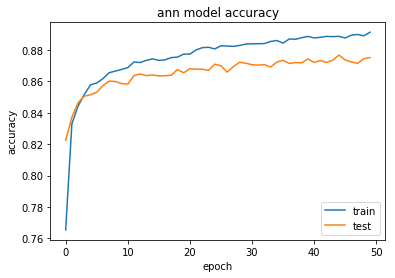

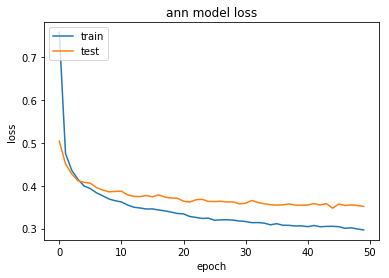

In [237]:
print(training_history_1.history.keys())
# summarize history for accuracy
plt.figure()
plt.plot(training_history_1.history['acc'])
plt.plot(training_history_1.history['val_acc'])
plt.title('ann model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(training_history_1.history['loss'])
plt.plot(training_history_1.history['val_loss'])
plt.title('ann model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[828   4  14  41   4   0  94   0  15   0]
 [  3 964   1  23   4   0   3   0   2   0]
 [ 18   2 793   9 112   0  59   0   7   0]
 [ 25   9  12 901  26   1  21   0   5   0]
 [  0   0 125  46 777   0  49   0   3   0]
 [  0   0   0   1   0 933   0  46   2  18]
 [158   3 117  30  89   0 578   0  25   0]
 [  0   0   0   0   0  14   0 966   0  20]
 [  3   2   5   6   3   1   5   6 969   0]
 [  0   0   0   0   0   7   0  51   1 941]]
Normalized confusion matrix
[[0.83 0.   0.01 0.04 0.   0.   0.09 0.   0.01 0.  ]
 [0.   0.96 0.   0.02 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.79 0.01 0.11 0.   0.06 0.   0.01 0.  ]
 [0.03 0.01 0.01 0.9  0.03 0.   0.02 0.   0.01 0.  ]
 [0.   0.   0.12 0.05 0.78 0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.93 0.   0.05 0.   0.02]
 [0.16 0.   0.12 0.03 0.09 0.   0.58 0.   0.03 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.97 0.   0.02]
 [0.   0.   0.01 0.01 0.   0.   0.01 0.01 0.97 0.  ]
 [0.   0.   0.   0.   0.

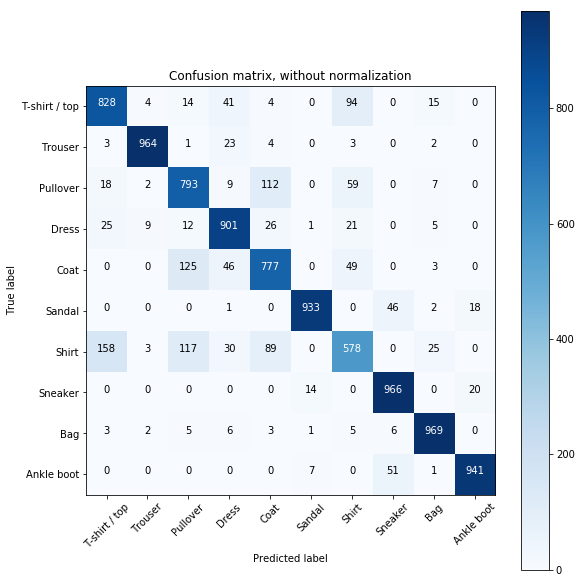

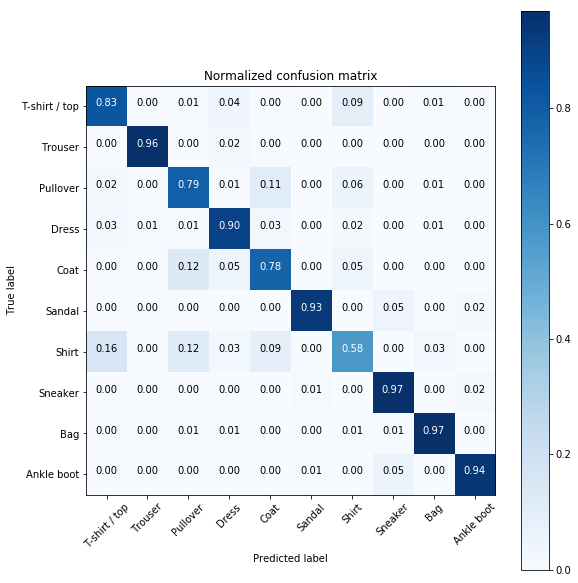

In [266]:
#y_pred = model.predict_classes(imgs) 
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

y_pred = model.predict(imgs)
y_predict = np.argmax(y_pred, axis=1)

#for i in range(len(y_predict)):
#    print("True=%s, Predicted=%s" % (lbls[i], y_predict[i]))
    
cnf_matrix = confusion_matrix(y_true=lbls, y_pred=y_predict) 
np.set_printoptions(precision=2)

# Plot unnormalized confusion matrix
fig = plt.figure()
fig.set_size_inches(8.5, 8.5)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
fig2 = plt.figure()
fig2.set_size_inches(8.5,8.5)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [267]:
print(classification_report(lbls, y_predict, target_names=class_names))

               precision    recall  f1-score   support

T-shirt / top       0.80      0.83      0.81      1000
      Trouser       0.98      0.96      0.97      1000
     Pullover       0.74      0.79      0.77      1000
        Dress       0.85      0.90      0.88      1000
         Coat       0.77      0.78      0.77      1000
       Sandal       0.98      0.93      0.95      1000
        Shirt       0.71      0.58      0.64      1000
      Sneaker       0.90      0.97      0.93      1000
          Bag       0.94      0.97      0.96      1000
   Ankle boot       0.96      0.94      0.95      1000

  avg / total       0.86      0.86      0.86     10000



In [268]:
# Part 2:
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.utils import plot_model
from keras import optimizers


img_rows, img_cols = 28, 28
images = np.reshape(images, (-1, img_rows, img_cols, 1))
imgs = np.reshape(imgs, (-1, img_rows, img_cols, 1))

rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9)

# CNN Model
# Input
# H1 = 40

inputs = Input(shape=(28,28,1))
conv1 = Conv2D(40, kernel_size=5, strides=(1, 1), padding='valid', activation='relu')(inputs)
conv1.shape
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
hidden1 = Dense(200, activation='relu')(flat1)
output = Dense(10, activation='softmax')(hidden1)

output.shape
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='C:\\Users\\Tish\\Documents\\DeepLearning\\small_cnn')

tensorboard = keras.callbacks.TensorBoard(log_dir='C:\\Users\\Tish\\Documents\\DeepLearning\\Graph2\\', histogram_freq=0,  
          write_graph=True, write_images=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 40)        1040      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 40)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5760)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 200)               1152200   
_________________________________________________________________
dense_76 (Dense)             (None, 10)                2010      
Total params: 1,155,250
Trainable params: 1,155,250
Non-trainable params: 0
_________________________________________________________________


In [269]:
train_history_2 = model.fit(images, labels, epochs=50, batch_size=200, callbacks=[tensorboard], validation_split=0.2, shuffle=False)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 142us/step - loss: 2.7504 - acc: 0.7397 - val_loss: 0.6561 - val_acc: 0.8320
Epoch 2/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.5345 - acc: 0.8455 - val_loss: 0.4225 - val_acc: 0.8648
Epoch 3/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.3355 - acc: 0.8873 - val_loss: 0.3982 - val_acc: 0.8743
Epoch 4/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.2497 - acc: 0.9132 - val_loss: 0.3916 - val_acc: 0.8819
Epoch 5/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.1965 - acc: 0.9322 - val_loss: 0.3930 - val_acc: 0.8872
Epoch 6/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.1589 - acc: 0.9461 - val_loss: 0.3947 - val_acc: 0.8868
Epoch 7/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.1303 - acc: 0.9552 - val_loss: 0.4311 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


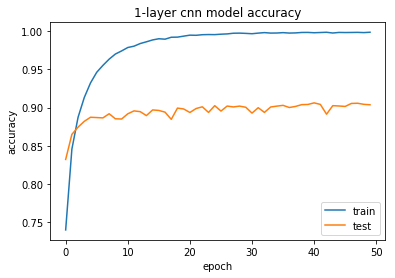

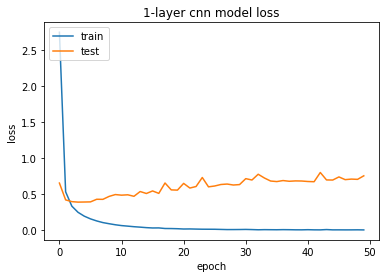

In [270]:
print(train_history_2.history.keys())
# summarize history for accuracy
plt.plot(train_history_2.history['acc'])
plt.plot(train_history_2.history['val_acc'])
plt.title('1-layer cnn model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(train_history_2.history['loss'])
plt.plot(train_history_2.history['val_loss'])
plt.title('1-layer cnn model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[802   2  18  26   7   2 136   1   6   0]
 [  2 979   1  10   2   0   3   0   3   0]
 [ 17   3 802   6  89   0  82   0   1   0]
 [ 15  10  13 898  21   2  38   0   3   0]
 [  2   0  43  29 866   0  58   0   2   0]
 [  0   0   0   0   0 977   0  11   1  11]
 [ 78   3  55  25  61   1 767   0  10   0]
 [  0   0   0   0   0  11   0 961   0  28]
 [  2   0   1   5   6   2  11   5 968   0]
 [  0   0   0   0   0   7   1  25   0 967]]
Normalized confusion matrix
[[0.8  0.   0.02 0.03 0.01 0.   0.14 0.   0.01 0.  ]
 [0.   0.98 0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.8  0.01 0.09 0.   0.08 0.   0.   0.  ]
 [0.01 0.01 0.01 0.9  0.02 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.04 0.03 0.87 0.   0.06 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.01 0.   0.01]
 [0.08 0.   0.06 0.03 0.06 0.   0.77 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.96 0.   0.03]
 [0.   0.   0.   0.01 0.01 0.   0.01 0.01 0.97 0.  ]
 [0.   0.   0.   0.   0.

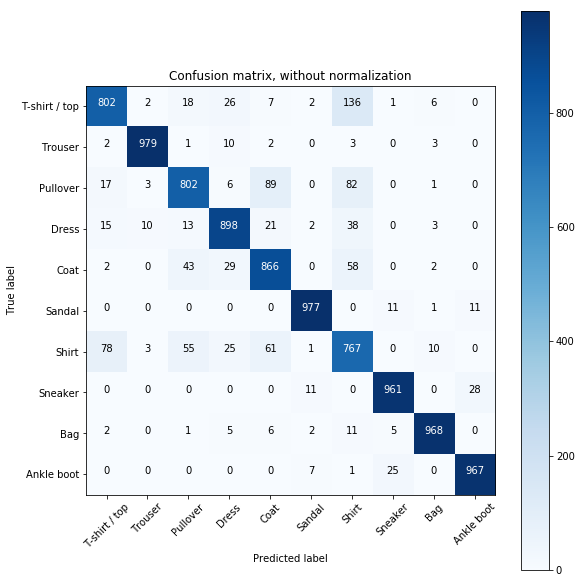

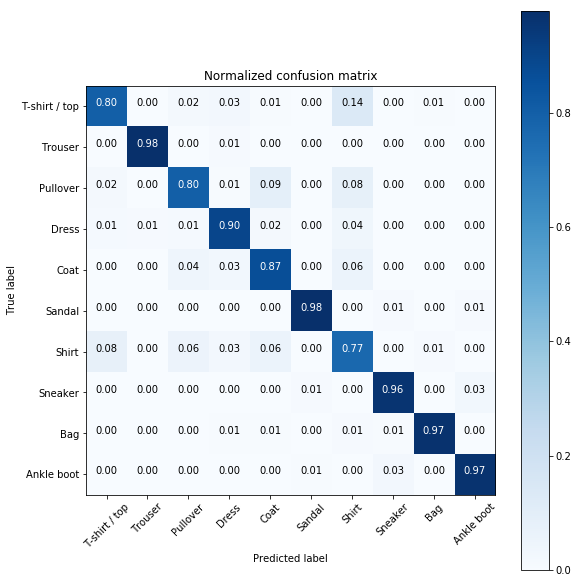

In [271]:
#y_pred = model.predict_classes(imgs) 
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

y_pred = model.predict(imgs)
y_predict = np.argmax(y_pred, axis=1)

#for i in range(len(y_predict)):
#    print("True=%s, Predicted=%s" % (lbls[i], y_predict[i]))
    
cnf_matrix = confusion_matrix(y_true=lbls, y_pred=y_predict) 
np.set_printoptions(precision=2)

# Plot unnormalized confusion matrix
fig = plt.figure()
fig.set_size_inches(8.5, 8.5)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
fig2 = plt.figure()
fig2.set_size_inches(8.5,8.5)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [272]:
print(classification_report(lbls, y_predict, target_names=class_names))

               precision    recall  f1-score   support

T-shirt / top       0.87      0.80      0.84      1000
      Trouser       0.98      0.98      0.98      1000
     Pullover       0.86      0.80      0.83      1000
        Dress       0.90      0.90      0.90      1000
         Coat       0.82      0.87      0.84      1000
       Sandal       0.98      0.98      0.98      1000
        Shirt       0.70      0.77      0.73      1000
      Sneaker       0.96      0.96      0.96      1000
          Bag       0.97      0.97      0.97      1000
   Ankle boot       0.96      0.97      0.96      1000

  avg / total       0.90      0.90      0.90     10000



In [273]:
# Part 3
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.utils import plot_model
from keras import optimizers


img_rows, img_cols = 28, 28
rmsprop = optimizers.RMSprop(lr=0.0005, rho=0.9)


inputs = Input(shape=(28,28,1))
conv1 = Conv2D(48, kernel_size=3, strides=(1, 1), padding='valid', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(96, kernel_size=3, strides=(1, 1), padding='valid', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
flat2 = Flatten()(pool2)
hidden1 = Dense(100, activation='relu')(flat2)
output = Dense(10, activation='softmax')(hidden1)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='C:\\Users\\Tish\\Documents\\DeepLearning\\bigger_cnn')

tensorboard = keras.callbacks.TensorBoard(log_dir='C:\\Users\\Tish\\Documents\\DeepLearning\\Graph3\\', histogram_freq=0,  
          write_graph=True, write_images=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 48)        480       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 48)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 96)        41568     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 96)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2400)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 100)               240100    
__________

In [274]:
train_history_3 = model.fit(images, labels, epochs=50, batch_size=200, callbacks=[tensorboard],  validation_split=0.2, shuffle=False)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 11s 228us/step - loss: 12.9900 - acc: 0.1928 - val_loss: 12.8906 - val_acc: 0.2002
Epoch 2/50
48000/48000 [==============================] - 11s 222us/step - loss: 12.9098 - acc: 0.1989 - val_loss: 12.8854 - val_acc: 0.2005
Epoch 3/50
48000/48000 [==============================] - 11s 223us/step - loss: 6.3969 - acc: 0.5128 - val_loss: 0.4396 - val_acc: 0.8457
Epoch 4/50
48000/48000 [==============================] - 11s 223us/step - loss: 0.3947 - acc: 0.8601 - val_loss: 0.3397 - val_acc: 0.8775
Epoch 5/50
48000/48000 [==============================] - 11s 223us/step - loss: 0.3001 - acc: 0.8903 - val_loss: 0.3283 - val_acc: 0.8822
Epoch 6/50
48000/48000 [==============================] - 11s 225us/step - loss: 0.2510 - acc: 0.9093 - val_loss: 0.3129 - val_acc: 0.8911
Epoch 7/50
48000/48000 [==============================] - 11s 225us/step - loss: 0.2141 - acc: 0.9221 - val_loss

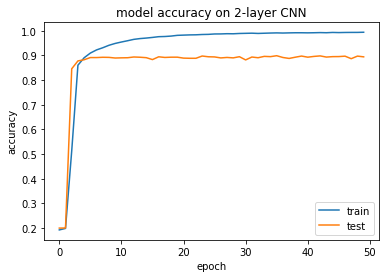

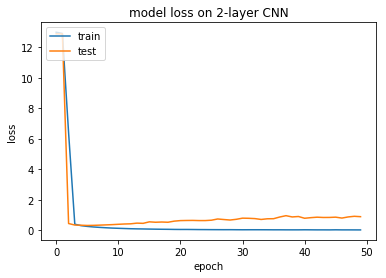

In [275]:
# summarize history for accuracy
plt.plot(train_history_3.history['acc'])
plt.plot(train_history_3.history['val_acc'])
plt.title('model accuracy on 2-layer CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(train_history_3.history['loss'])
plt.plot(train_history_3.history['val_loss'])
plt.title('model loss on 2-layer CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[817   4  30  24   7   1 112   0   5   0]
 [  6 976   2  10   3   0   1   0   2   0]
 [ 14   1 858  10  62   0  53   0   2   0]
 [ 17  11  12 913  21   0  21   0   5   0]
 [  2   1  85  45 821   0  45   0   1   0]
 [  1   0   0   0   0 963   0  19   4  13]
 [115   0  84  31  71   0 689   0  10   0]
 [  0   0   0   0   0  11   0 972   4  13]
 [  2   0   7   3   5   0   6   2 974   1]
 [  0   0   1   0   0   4   0  49   0 946]]
Normalized confusion matrix
[[0.82 0.   0.03 0.02 0.01 0.   0.11 0.   0.01 0.  ]
 [0.01 0.98 0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.86 0.01 0.06 0.   0.05 0.   0.   0.  ]
 [0.02 0.01 0.01 0.91 0.02 0.   0.02 0.   0.01 0.  ]
 [0.   0.   0.09 0.04 0.82 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.96 0.   0.02 0.   0.01]
 [0.12 0.   0.08 0.03 0.07 0.   0.69 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.97 0.   0.01]
 [0.   0.   0.01 0.   0.01 0.   0.01 0.   0.97 0.  ]
 [0.   0.   0.   0.   0.

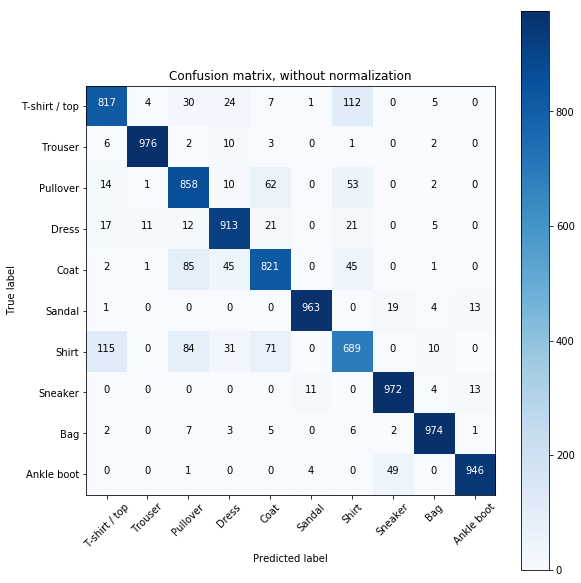

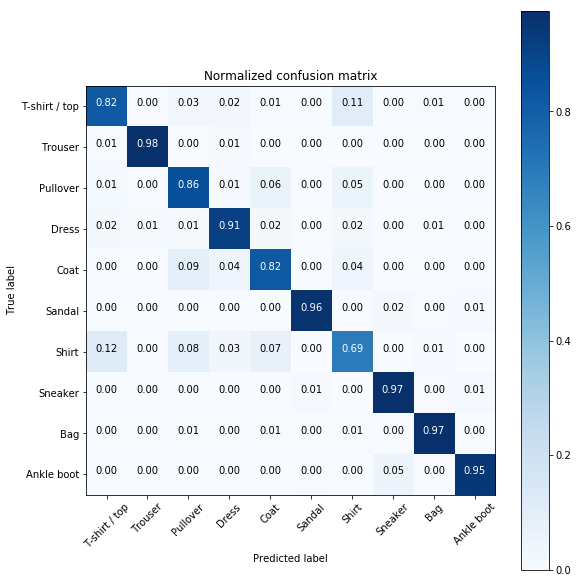

In [276]:
#y_pred = model.predict_classes(imgs) 
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

y_pred = model.predict(imgs)
y_predict = np.argmax(y_pred, axis=1)

#for i in range(len(y_predict)):
#    print("True=%s, Predicted=%s" % (lbls[i], y_predict[i]))
    
cnf_matrix = confusion_matrix(y_true=lbls, y_pred=y_predict) 
np.set_printoptions(precision=2)

# Plot unnormalized confusion matrix
fig = plt.figure()
fig.set_size_inches(8.5, 8.5)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
fig2 = plt.figure()
fig2.set_size_inches(8.5,8.5)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [277]:
print(classification_report(lbls, y_predict, target_names=class_names))

               precision    recall  f1-score   support

T-shirt / top       0.84      0.82      0.83      1000
      Trouser       0.98      0.98      0.98      1000
     Pullover       0.80      0.86      0.83      1000
        Dress       0.88      0.91      0.90      1000
         Coat       0.83      0.82      0.83      1000
       Sandal       0.98      0.96      0.97      1000
        Shirt       0.74      0.69      0.72      1000
      Sneaker       0.93      0.97      0.95      1000
          Bag       0.97      0.97      0.97      1000
   Ankle boot       0.97      0.95      0.96      1000

  avg / total       0.89      0.89      0.89     10000



In [19]:
def func(x):
    print(x)

In [13]:
func

<function __main__.func>

In [14]:
def get_func():
    return func

In [15]:
get_func()(5)

5
